# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [12]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [1]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [2]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
boston.data.shape

(506, 13)

In [4]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
# Print description of Boston housing data set
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Now let's explore the data set itself. 

In [6]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [7]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [8]:
print(boston.target.shape)

(506,)


In [9]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [10]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

Text(0.5, 1.0, 'Relationship between CRIM and Price')

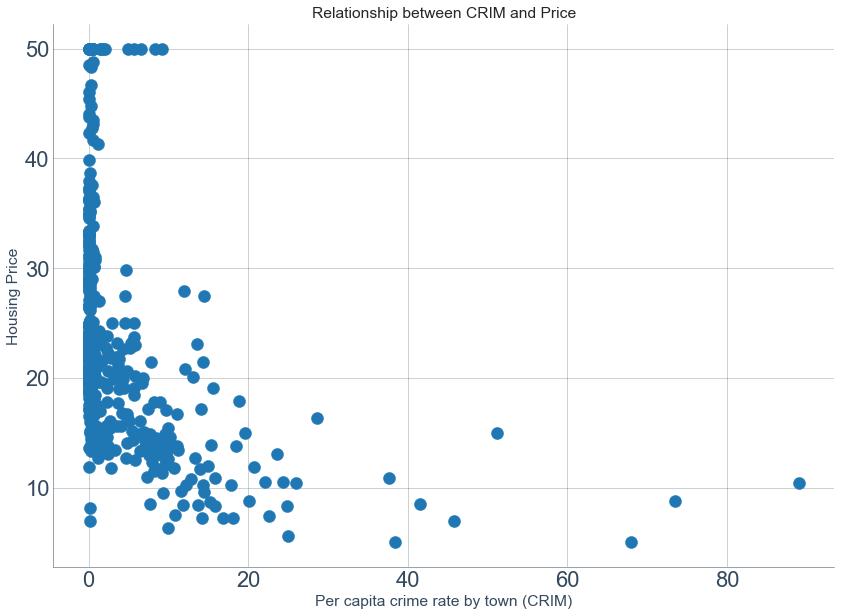

In [18]:
import matplotlib as mpl
   
# Figure
mpl.rc('figure', 
       figsize= (14, 10),
       facecolor='w', 
       edgecolor='w', 
       titlesize='xx-large',
       titleweight=700)



rcParams['font.sans-serif']: ['Helvetica', 'Verdana', 'Lucida Grande']
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

#### Exercise: What kind of relationship do you see? e.g. positive, negative? linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?
**Answer:** As expected, we notice a negative correlation between housing price and "per capita crime rate by town". The relationship appears to be non-linear but I suspect that some of the sub-urbs for which the per capita crime rate is very low are the ones who are contributing to this non-linearity the most. If we consider sub-urbs where the crime rate is > 10, the relationship between housing price and crime rate can be seen as roughly linear.  One interesting aspect of this data is that the house prices seem to be capped at 50000 which seems to be quite low considering the house prices today. So I think this data may be quite old.  

There seem to be quite a few outliers when crime rate is low. From the graph, we can infer that while sub-urbs with higher crime rates have lower priced houses, sub-urbs with really less crime rates have housing which is priced all across the spectrum. This suggests that the variability in the price is  not all related to the crime rate but other factors as well. 

#### Exercise: Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.

Text(0.5, 1.0, 'Relationship between RM and Price')

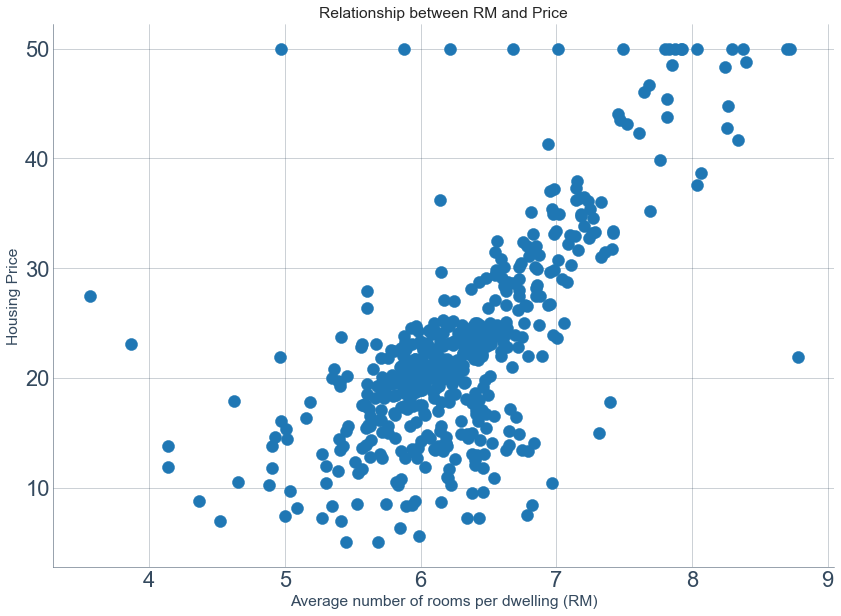

In [19]:
# your turn: scatter plot between *RM* and *PRICE*
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Average number of rooms per dwelling (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")

**Story:** This relationship seems to be more strongly linear than the relation between crime and housing price. The relationship between these two variables also seems to be positive. This plot makes intuitive sense because one expects the price of a house to go up as the number of rooms it has increases. The average number of rooms per house in most suburbs is more than 4. However, there are some suburbs for which the average number of rooms is less than 4. Suburbs with the largest houses (average number of rooms > 7) have most of the expensive houses though there are some suburbs with lesser number of average rooms per house which are also expensive areas. 

Text(0.5, 1.0, 'Relationship between PTRATIO and Price')

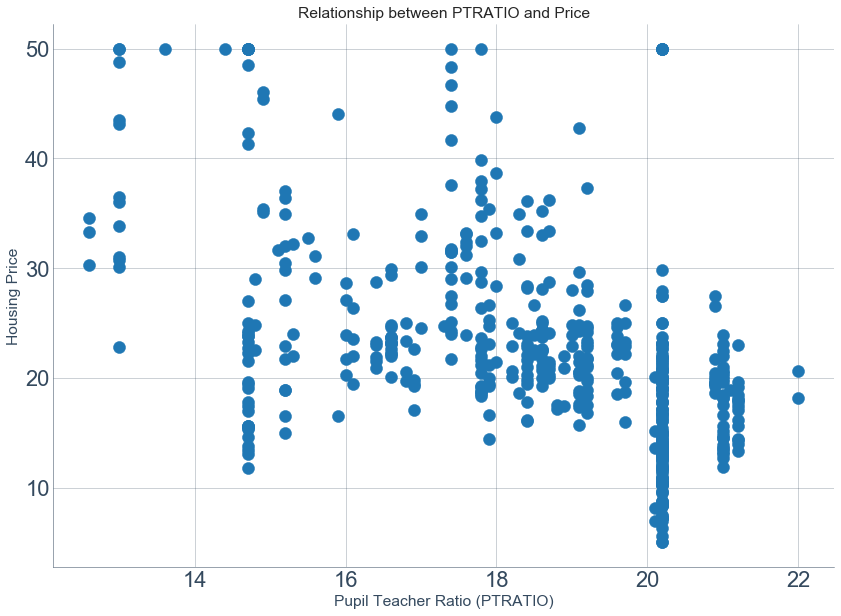

In [20]:
# your turn: scatter plot between *PTRATIO* and *PRICE*
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("Pupil Teacher Ratio (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

**Story:** We can observe a negative correlation between housing price and the pupil teacher ratio. In other words, suburbs with expensive houses also tend to have lower pupil teacher ratio in schools. This maybe because good schools with low pupil teacher ratio may be located in expensive neighborhoods. On the other hand, low pupil teacher ratio in schools might be an attractive feature which will make the area more desirable and drive up the prices of the housing. 

Text(0.5, 1.0, 'Relationship between Age of House and Price')

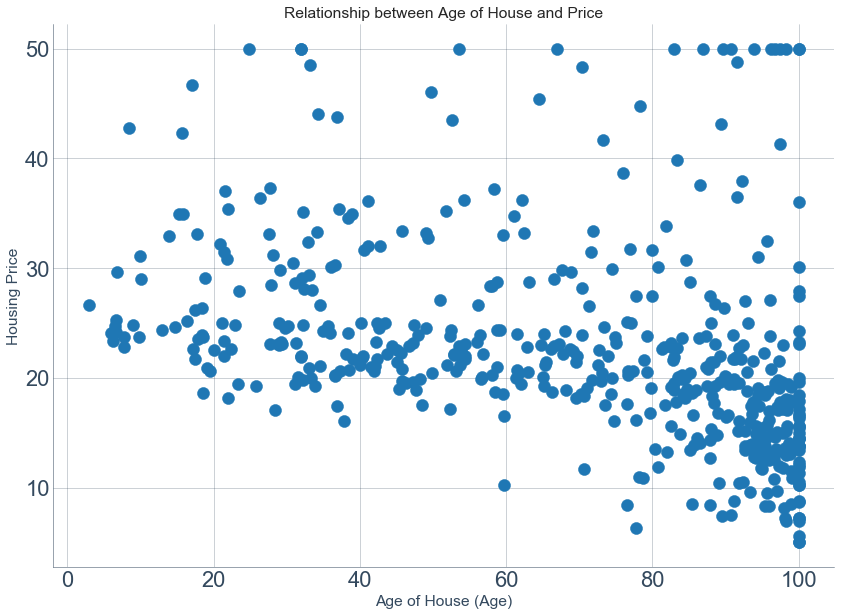

In [21]:
# your turn: create some other scatter plots
plt.scatter(bos.AGE, bos.PRICE)
plt.xlabel("Age of House (Age)")
plt.ylabel("Housing Price")
plt.title("Relationship between Age of House and Price")

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

### Switching to Seaborn so that we can visualize the linear regression line as well 

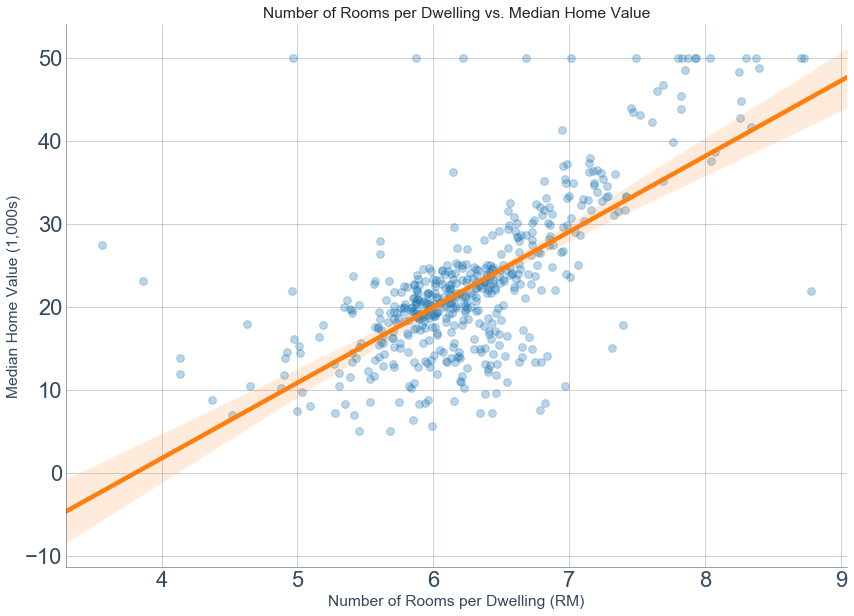

In [25]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True,scatter_kws={'color': 'C0', 'alpha':0.3, 's':60}, 
            line_kws={'color': 'C1'})
_ = plt.xlabel('Number of Rooms per Dwelling (RM)')
_ = plt.ylabel('Median Home Value (1,000s)')
_ = plt.title('Number of Rooms per Dwelling vs. Median Home Value');

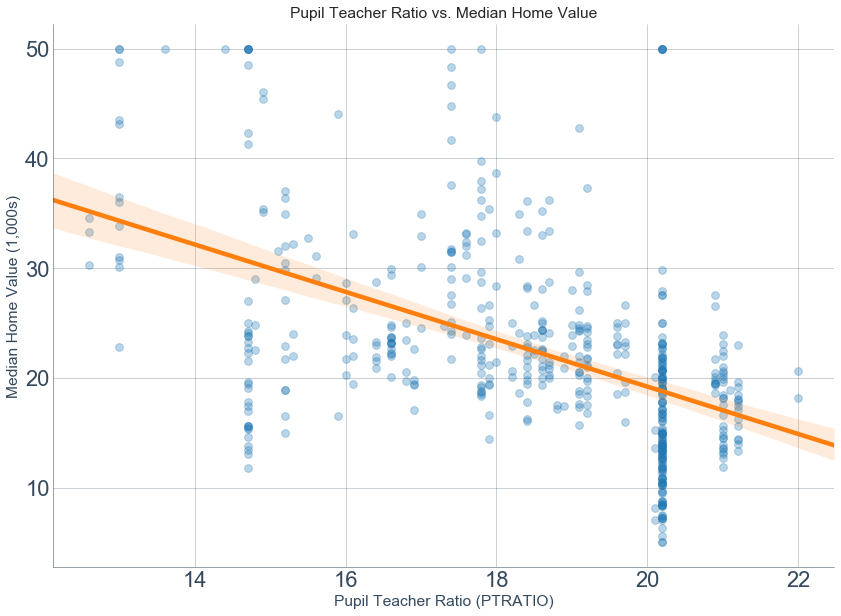

In [26]:
sns.regplot(y="PRICE", x="PTRATIO", data=bos, fit_reg = True,scatter_kws={'color': 'C0', 'alpha':0.3, 's':60}, 
            line_kws={'color': 'C1'})
_ = plt.xlabel('Pupil Teacher Ratio (PTRATIO)')
_ = plt.ylabel('Median Home Value (1,000s)')
_ = plt.title('Pupil Teacher Ratio vs. Median Home Value');

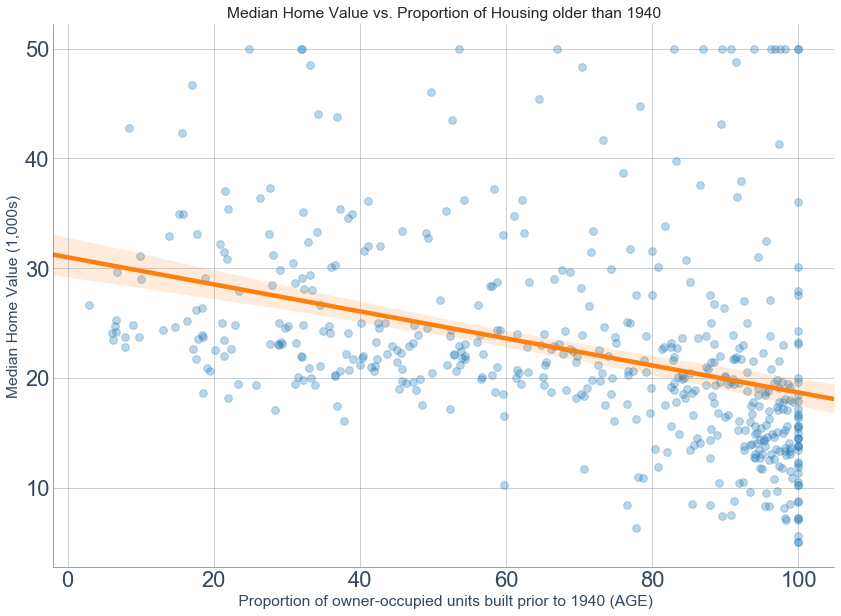

In [191]:
sns.regplot(y="PRICE", x="AGE", data=bos, fit_reg = True,scatter_kws={'color': 'C0', 'alpha':0.3, 's':60}, 
            line_kws={'color': 'C1'})
_ = plt.xlabel(' Proportion of owner-occupied units built prior to 1940 (AGE)')
_ = plt.ylabel('Median Home Value (1,000s)')
_ = plt.title('Median Home Value vs. Proportion of Housing older than 1940');

Above plot also roughly makes sense because we expect house prices to depreciate over time. On the other hand, there are many old houses which are expensive. Possibly because they are located in good neighborhoods and are large. Maybe other factors at play too. 

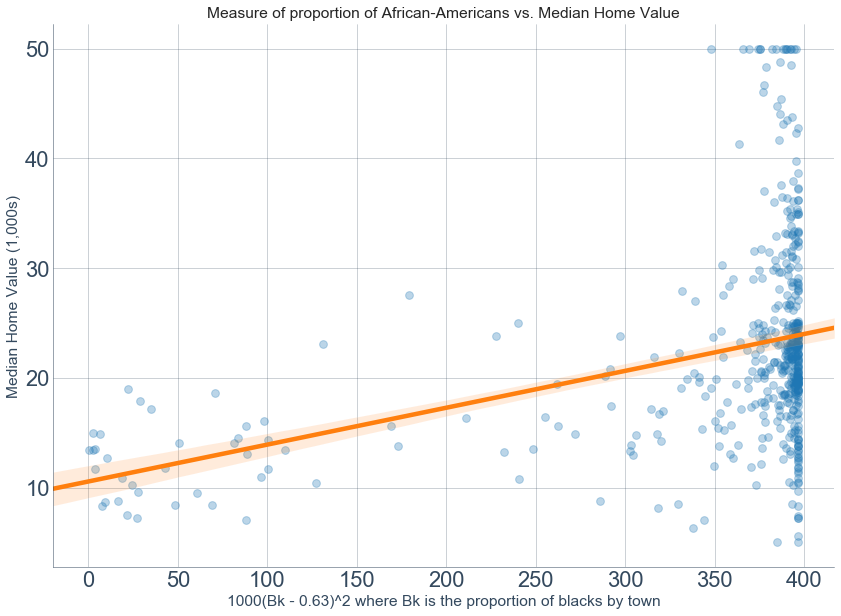

In [29]:
 sns.regplot(y="PRICE", x="B", data=bos, fit_reg = True,scatter_kws={'color': 'C0', 'alpha':0.3, 's':60}, 
            line_kws={'color': 'C1'})
_ = plt.xlabel('1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town')
_ = plt.ylabel('Median Home Value (1,000s)')
_ = plt.title('Measure of proportion of African-Americans vs. Median Home Value');

The above formula makes me think that the highest proportion of African-Americans by town is 63% so the quantity (Bk-0.63)^2 scales inversely with the proportion of African-Americans. We can see that there seems to be an inverse relationship between the median home value vs the proportion of African-Americans in a particular town. We can also see that neighborhoods with very high median values of homes have very low proportion of African-Americans.

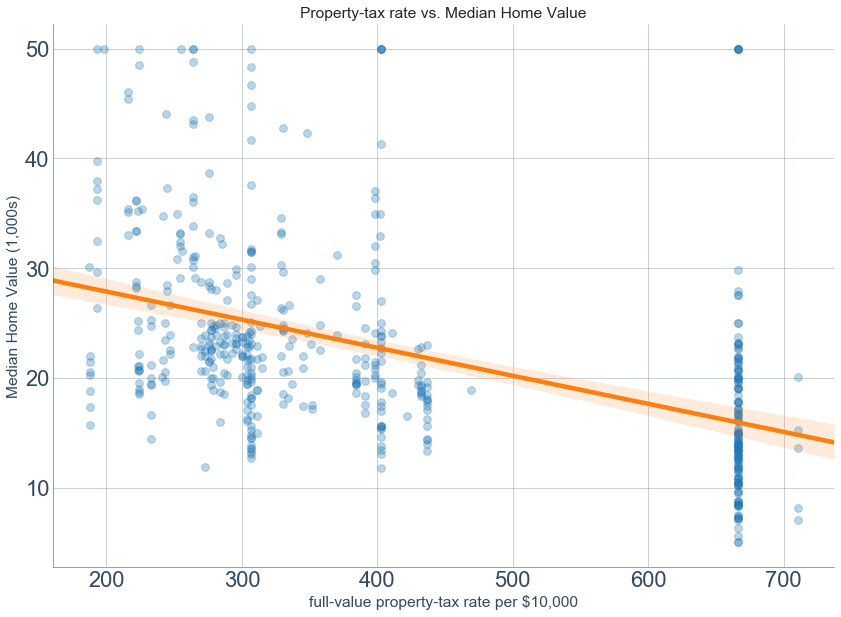

In [30]:
sns.regplot(y="PRICE", x="TAX", data=bos, fit_reg = True,scatter_kws={'color': 'C0', 'alpha':0.3, 's':60}, 
            line_kws={'color': 'C1'})
_ = plt.xlabel('full-value property-tax rate per $10,000')
_ = plt.ylabel('Median Home Value (1,000s)')
_ = plt.title('Property-tax rate vs. Median Home Value');

Median home value seems to have negative correlation with property-tax rate? 

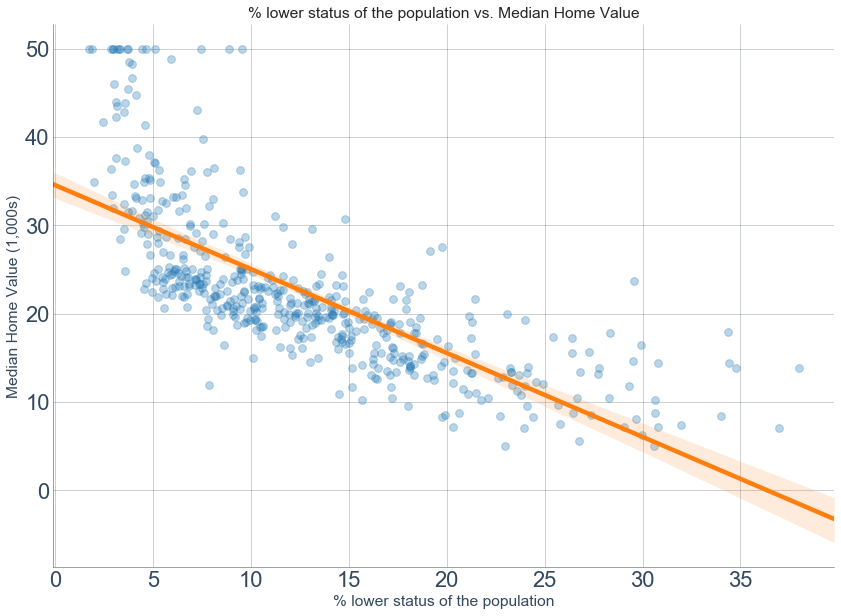

In [32]:
sns.regplot(y="PRICE", x="LSTAT", data=bos, fit_reg = True,scatter_kws={'color': 'C0', 'alpha':0.3, 's':60}, 
            line_kws={'color': 'C1'})
_ = plt.xlabel('% lower status of the population')
_ = plt.ylabel('Median Home Value (1,000s)')
_ = plt.title('% lower status of the population vs. Median Home Value');

This makes intuitive sense. Suburbs with greater percentage of people who are designated as lower status also tend to have lower home values. 

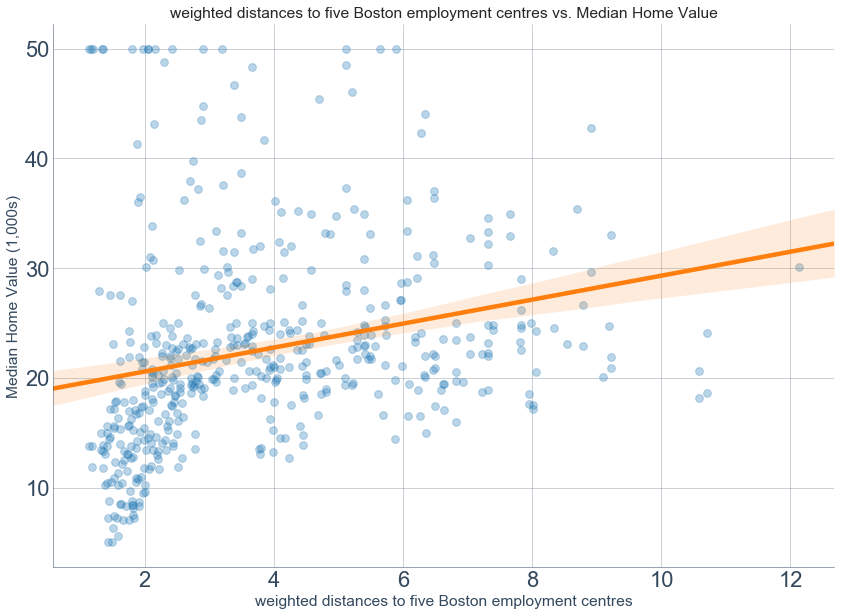

In [33]:
sns.regplot(y="PRICE", x="DIS", data=bos, fit_reg = True,scatter_kws={'color': 'C0', 'alpha':0.3, 's':60}, 
            line_kws={'color': 'C1'})
_ = plt.xlabel('weighted distances to five Boston employment centres')
_ = plt.ylabel('Median Home Value (1,000s)')
_ = plt.title('weighted distances to five Boston employment centres vs. Median Home Value');

We observe that the suburbs with low housing prices are also the ones which are located nearest to the employment centers. Possibly because we expect employment centers etc. to be located in areas where individuals are the most in need of employment. 

### Histograms
***


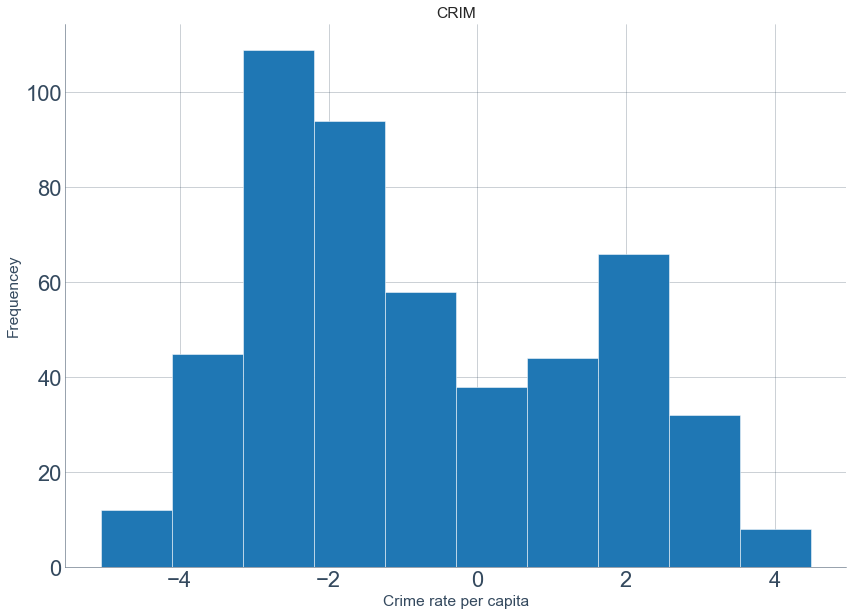

In [36]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

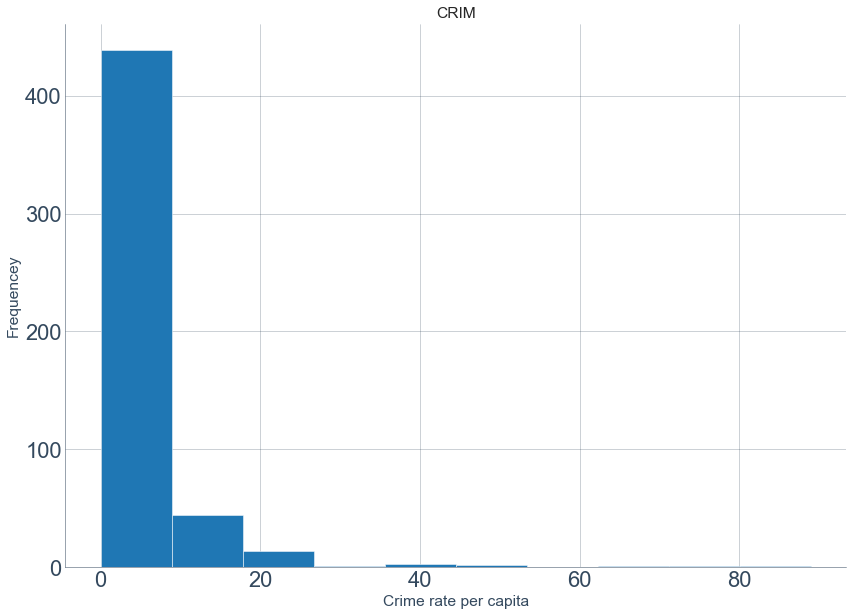

In [39]:
#your turn
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

**Exercise:** In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

**Answer:** Without making the transformation, most of the data was visually clustered in the lowest bin . The log transformation introduces more separation between the different suburbs and after making log the transformation, we can see some more structure of the data. The crime rate seems to be bimodal. 

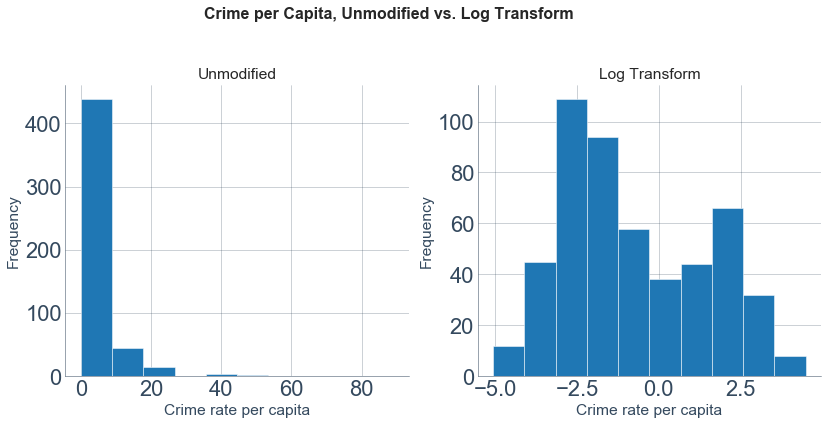

In [43]:
# Examining the histograms side by side.
plt.subplots(1,2, figsize=(15,6))

plt.subplot(121)
plt.hist(bos.CRIM)
plt.title("Unmodified")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequency")

plt.subplot(122)
plt.hist(np.log(bos.CRIM))
plt.title("Log Transform")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequency")

plt.suptitle('Crime per Capita, Unmodified vs. Log Transform', fontsize=16)

plt.subplots_adjust(left=0.2, wspace=0.2, top=0.8)
plt.show();

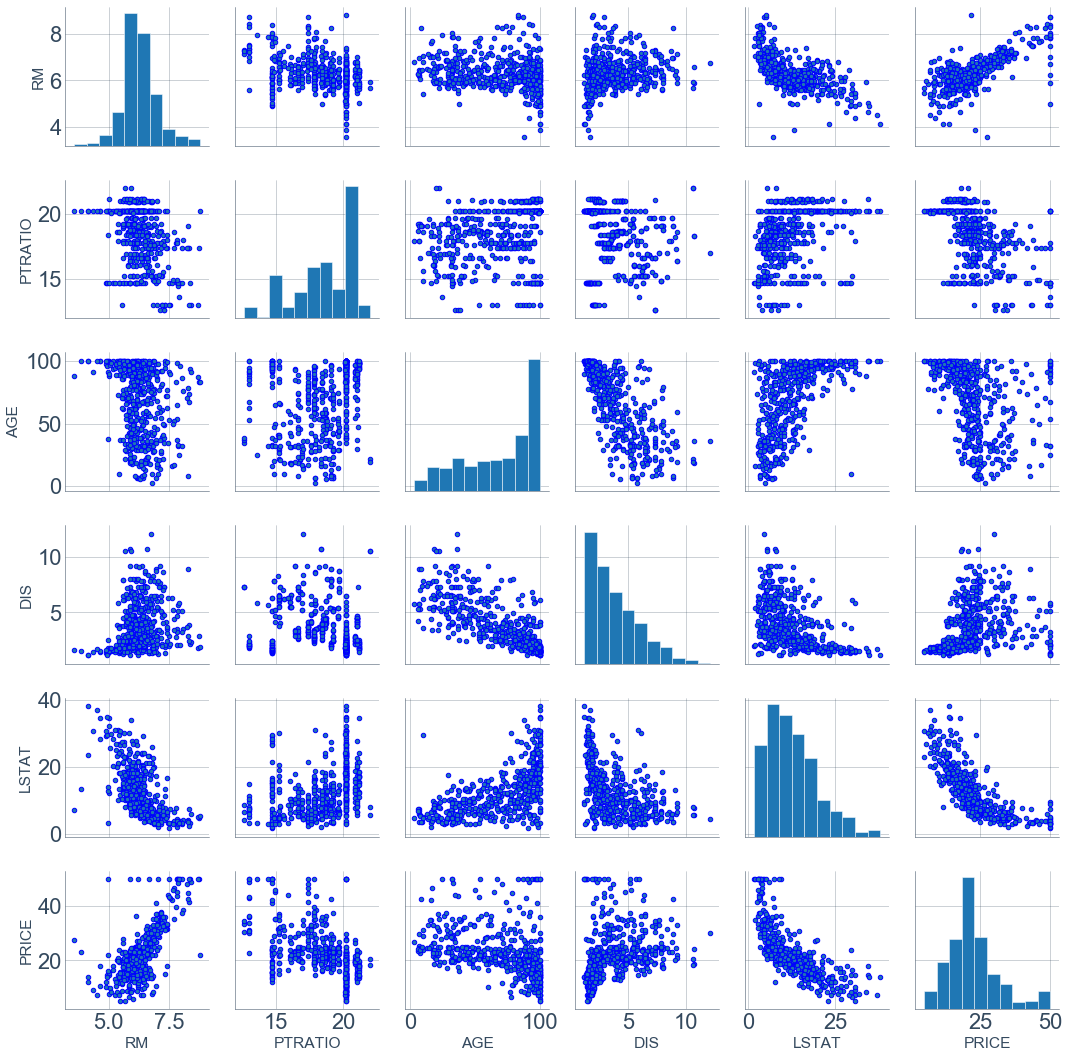

In [192]:
sns.pairplot(bos, plot_kws=dict(s=20, edgecolor="b", linewidth=1),vars=['RM', 'PTRATIO', 'AGE', 'DIS', 'LSTAT', 'PRICE'])
plt.show();

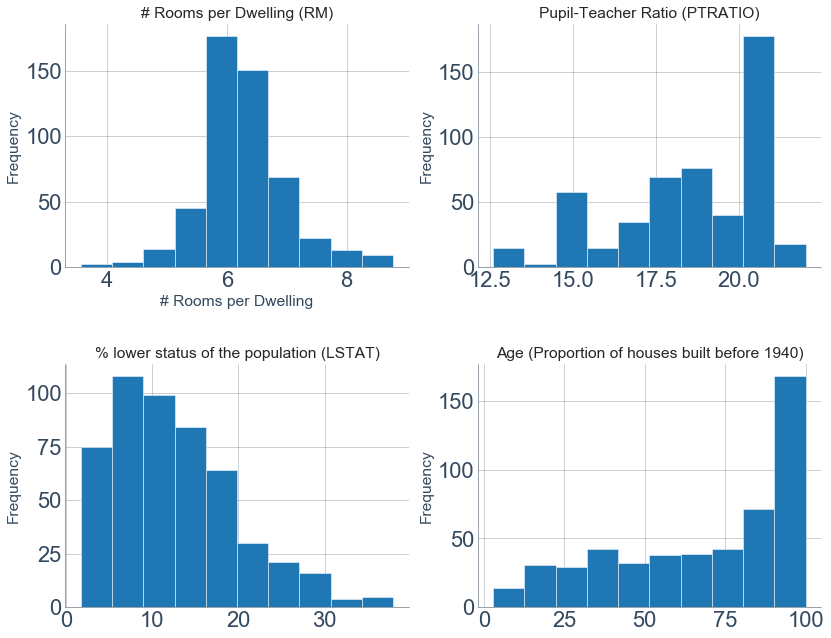

In [64]:
plt.subplots(2,2, figsize=(15,12))

plt.subplot(221)
plt.hist(bos.RM)
plt.title('# Rooms per Dwelling (RM)')
plt.xlabel('# Rooms per Dwelling')
plt.ylabel('Frequency')

plt.subplot(222)
plt.hist(bos.PTRATIO)
plt.title('Pupil-Teacher Ratio (PTRATIO)')
plt.ylabel('Frequency')

plt.subplot(223)
plt.hist(bos.LSTAT)
plt.title('% lower status of the population (LSTAT)')
plt.ylabel('Frequency')

plt.subplot(224)
plt.hist(bos.AGE)
plt.title('Age (Proportion of houses built before 1940)')
plt.ylabel('Frequency')

plt.subplots_adjust(left=0.2, wspace=0.2, hspace=0.4, top=0.8)
plt.show();

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [65]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [66]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 27 Jun 2019   Prob (F-statistic):           2.49e-74
Time:                        11:23:06   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

C:\Users\Ravi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Relationship between True Price and  Predicted Price from Linear Regression')

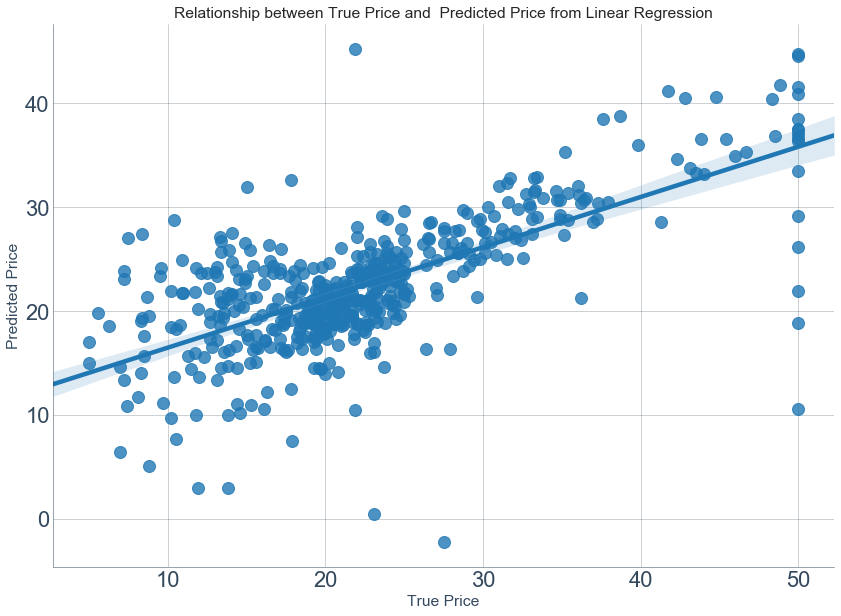

In [85]:
# your turn
bos["pred_price_statmodel"]=m.fittedvalues
sns.regplot(bos.PRICE, bos.pred_price_statmodel)
plt.xlabel("True Price")
plt.ylabel("Predicted Price")
plt.title("Relationship between True Price and  Predicted Price from Linear Regression")

**Answer:** Overall the linear regression model which uses just the "RM" variable to predict price does a reasonable job for the low and medium priced homes (<50) . On the other hand there seem to be some houses which are large but are not expensive which the model fails to capture (because of the linearity in one variable)

### Fitting Linear Regression using `sklearn`


In [72]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### What output can you get?

In [74]:
# Look inside lm object
# lm.<tab>

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [75]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


#### Exercise:  How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).
**Answer:** In order to not fit an intercept term, we can add the argument fit_intercept=False to the lm.fit() function. For housing price, I would not force the intercept to be 0. The reason is that in some instances the variables are inversely correlated to the price. Also, variables such as number of rooms per dwelling cannot assume 0 values. If we were to force the fit to go to 0 when the number of rooms per dwelling  go to 0, it would potentially hurt the fit for actual values. 

#### Exercise: One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.
**Answer:** Samples from normal distributions can be assumed to be independent and identically distributed (because they originate from the same distribution)

#### Exercise: To use linear regression, $Y$ must be normally distributed. Explain your answer 
**Answer:** The target variable does not have to be normally distributed. We may have cases where the probability for each sample is the same and we can still use a linear regression to estimate it. 

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [76]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.45948838509009


In [77]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [78]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [79]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

C:\Users\Ravi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Frequency')

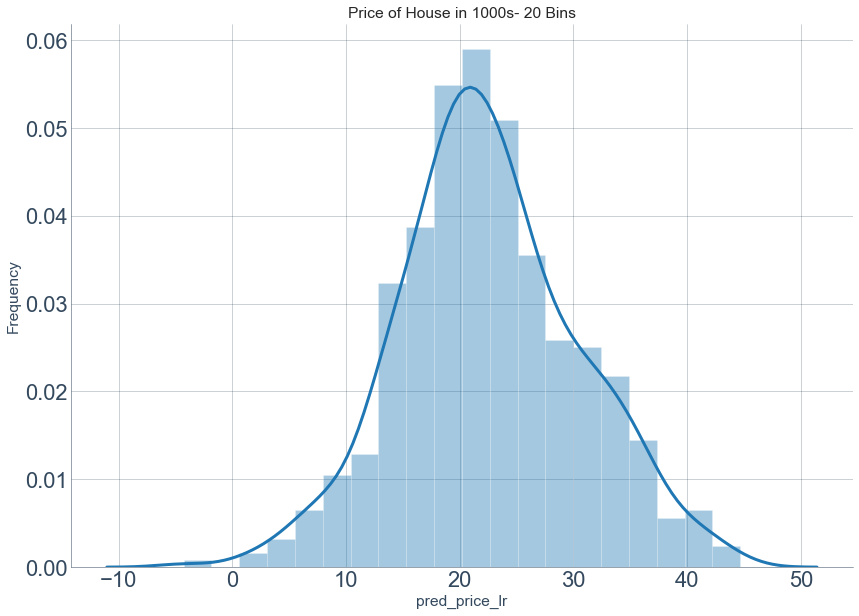

In [92]:
# your turn
# Histogram with 20 bins
bos["pred_price_lr"]=lm.predict(X)
sns.distplot(bos['pred_price_lr'], bins=20)
plt.title('Price of House in 1000s- 20 Bins')
plt.ylabel('Frequency')

C:\Users\Ravi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Frequency')

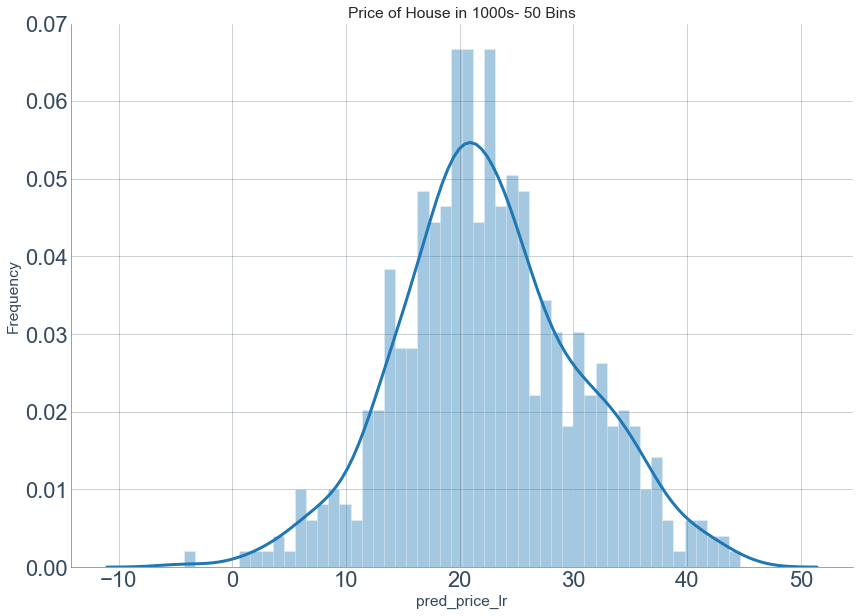

In [93]:
# your turn
# Histogram with 50 bins
bos["pred_price_lr"]=lm.predict(X)
sns.distplot(bos['pred_price_lr'], bins=50)
plt.title('Price of House in 1000s- 50 Bins')
plt.ylabel('Frequency')

Text(0, 0.5, 'Prediction from Linear Regression')

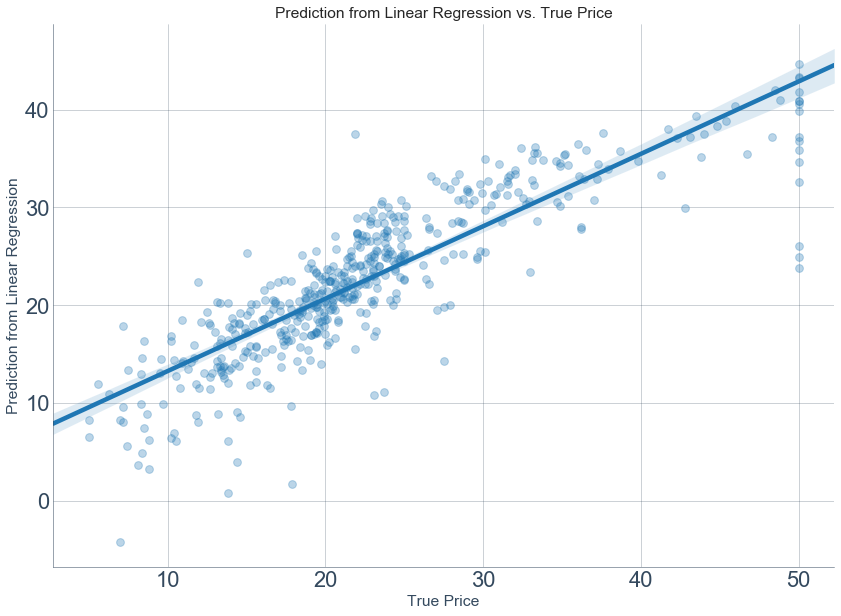

In [99]:
sns.regplot(bos['PRICE'],bos['pred_price_lr'],fit_reg = True,scatter_kws={'color': 'C0', 'alpha':0.3, 's':60})
plt.title('Prediction from Linear Regression vs. True Price')
plt.xlabel('True Price')
plt.ylabel('Prediction from Linear Regression')

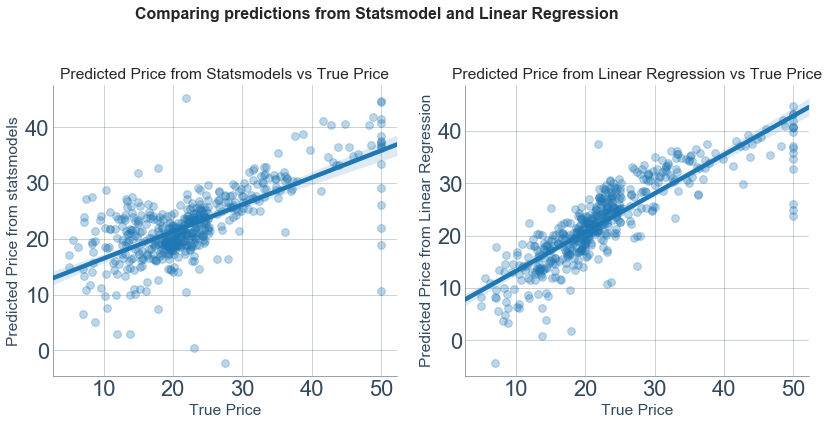

In [101]:
plt.subplots(1,2, figsize=(15,6))

plt.subplot(121)
sns.regplot(bos.PRICE,bos.pred_price_statmodel,scatter_kws={'color': 'C0', 'alpha':0.3, 's':60})
plt.title("Predicted Price from Statsmodels vs True Price")
plt.xlabel("True Price")
plt.ylabel("Predicted Price from statsmodels")

plt.subplot(122)
sns.regplot(bos.PRICE,bos.pred_price_lr,scatter_kws={'color': 'C0', 'alpha':0.3, 's':60})
plt.title("Predicted Price from Linear Regression vs True Price")
plt.xlabel("True Price")
plt.ylabel("Predicted Price from Linear Regression")

plt.suptitle('Comparing predictions from Statsmodel and Linear Regression', fontsize=16)

plt.subplots_adjust(left=0.2, wspace=0.2, top=0.8)
plt.show();

Statsmodel provides us with a straightforward way to explore the relationship between the target value and individual independent variable. Statsmodel also outputs useful information which can tell us more about the strength of the relationship between the two quantities through p-values, R-squared measures, confidence levels for the coefficient and intercept etc. In addition, results from statistical tests such as Durbin-Watson and others are output which can shed additional light on the relationship between the quantities being explored. Multiple regression can be carried out in Statsmodel but the syntax would need us to write out all the independent variables we are interested in. 

On the other hand, Linear Regression under scikitlearn is used to obtain machine learning model by fitting a linear model connecting the target variable to all the independent variables in the training dataset. This model can be used to predict the target variable for unseen data. This can be achieved using simple commands and follows the standard syntax which we are familiar with (fit and predict methods). Corresponding scores measuring the coefficient of fit and accuracy on test sets can be obtained but the output is not as exhaustive as the one provided by Statsmodel

In [102]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11078.784577954977


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [104]:
print(np.sum((lm.predict(X) - np.mean(bos.PRICE)) ** 2))

31637.510837064707


<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

In [105]:
# your turn
m = ols('PRICE ~ PTRATIO',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Thu, 27 Jun 2019   Prob (F-statistic):           1.61e-34
Time:                        14:42:39   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

Text(0.5, 1.0, 'Relationship between Price and PT Ratio')

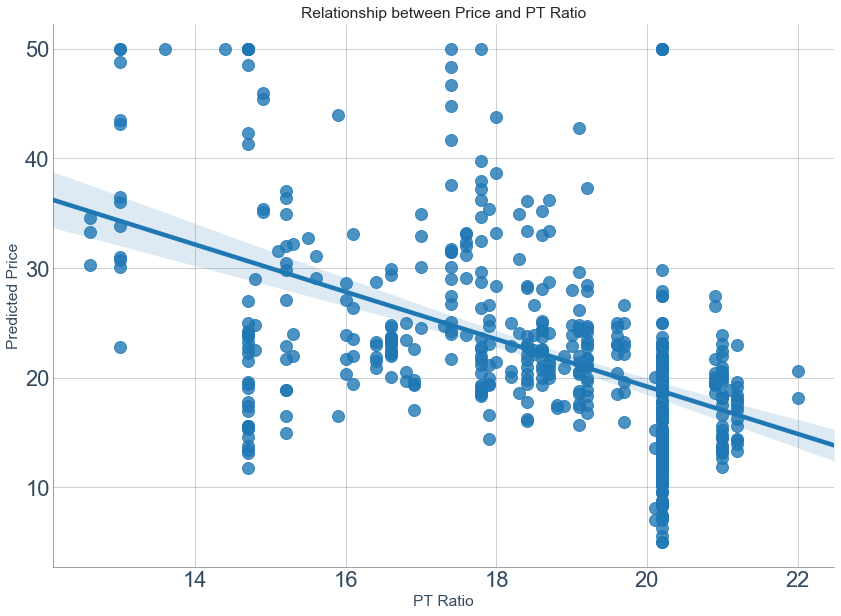

In [108]:
sns.regplot(bos.PTRATIO,bos.PRICE)
plt.xlabel("PT Ratio")
plt.ylabel("Predicted Price")
plt.title("Relationship between Price and PT Ratio")

Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.

Having fit a linear regression model connecting PTRATIO and the PRICE, we find that the coefficient is -2.1572. This means that for every 1 point increase in the pupil-teacher ratio in the area, the price of the house falls by around $ 2157.

The intercept of 62.3446 means that when the PT ratio is 0, then the price of the house is estimated to be around $ 62345. This does not make physical sense because having a 0 student to teacher ratio is not realistic. 

Calculate (or extract) the R2 value. What does it tell you?
The R2 value is 0.258. The R2 value indicates that only 0.258 of the total variance in the response variable (price) can be explained by the linear regression model which uses only PTRatio to capture the variation of the price. This tells me that while PTRatio maybe responsible for some of the variance we see in the price of the House, there maybe other more important factors which can better explain the variance observed in the price. 

Compute the F-statistic. What does it tell you?
The F-statistic of 175 indicates that the null-hypothesis that the price of the house and PTRatio are unrelated can be rejected. There is a statistically significant relationship between price of house and PTRatio. The large absolute value of the t-statistic also supports the conclusion that the null hypothesis can be rejected (not sure about this...please check)

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [109]:
# your turn
m_3vars = ols('PRICE ~ CRIM + RM + PTRATIO', bos).fit()
m_3vars.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Thu, 27 Jun 2019   Prob (F-statistic):           6.15e-98
Time:                        15:13:23   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.404     -11.296       4.555
CRIM          -0.2050      0.032     -6.399      0.000      -0.268      -0.142
RM             7.3804      0.402     18.382      0.000       6.592       8.169
PTRATIO       -1.0695      0.133     -8.051      0.000      -1.331      -0.809
==============================================================================
Omnibus:                      234.656   Durbin-Watson:                   0.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2020.689
Skew:                           1.815   Prob(JB):                         0.00
Kurtosis:                      12.092   Cond. No.                         311.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

We can add LSTAT and B variables which we saw during our initial visual EDA that these variables might be related to the target variable PRICE.

In [111]:
# your turn
m_5vars = ols('PRICE ~ CRIM + RM + PTRATIO + LSTAT + NOX', bos).fit()
m_5vars.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     214.1
Date:                Thu, 27 Jun 2019   Prob (F-statistic):          8.91e-122
Time:                        15:43:24   Log-Likelihood:                -1550.6
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.4689      4.116      4.244      0.000       9.382      25.556
CRIM          -0.0620      0.032     -1.965      0.050      -0.124    4.65e-06
RM             4.6332      0.428     10.815      0.000       3.792       5.475
PTRATIO       -0.8935      0.119     -7.500      0.000      -1.128      -0.659
LSTAT         -0.5222      0.051    -10.181      0.000      -0.623      -0.421
NOX           -1.3190      2.553     -0.517      0.606      -6.334       3.696
==============================================================================
Omnibus:                      224.249   Durbin-Watson:                   0.882
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1281.912
Skew:                           1.873   Prob(JB):                    4.33e-279
Kurtosis:                       9.839   Cond. No.                         439.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
rss_reduced = m_3vars.ssr
rss_full = m_5vars.ssr
df_reduced = m_3vars.df_resid
df_full = m_5vars.df_resid
f = ((rss_reduced - rss_full)/(df_reduced - df_full))/(rss_full/df_full)
print('F-statistic is:', f)

# extract AIC's
print('AIC - reduced: \t{}\nAIC - full: \t{}\nDifference: \t{}'.format(m_3vars.aic, m_5vars.aic, m_3vars.aic - m_5vars.aic))

F-statistic is: 68.5758090273681
AIC - reduced: 	3231.945123544996
AIC - full: 	3113.290952382385
Difference: 	118.65417116261096


A large f-statistic comparing these two nested models as well as a positive difference in the AIC between the reduced model and the full model indicates that adding these two features helps in improving the predictability of the linear model. The R2 values have also increased going from the 3 feature model to the 5 feature model. 


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

In [116]:
# Your turn.
bos["m_3vars_fitted"]=m_3vars.fittedvalues

Text(0, 0.5, 'Residual')

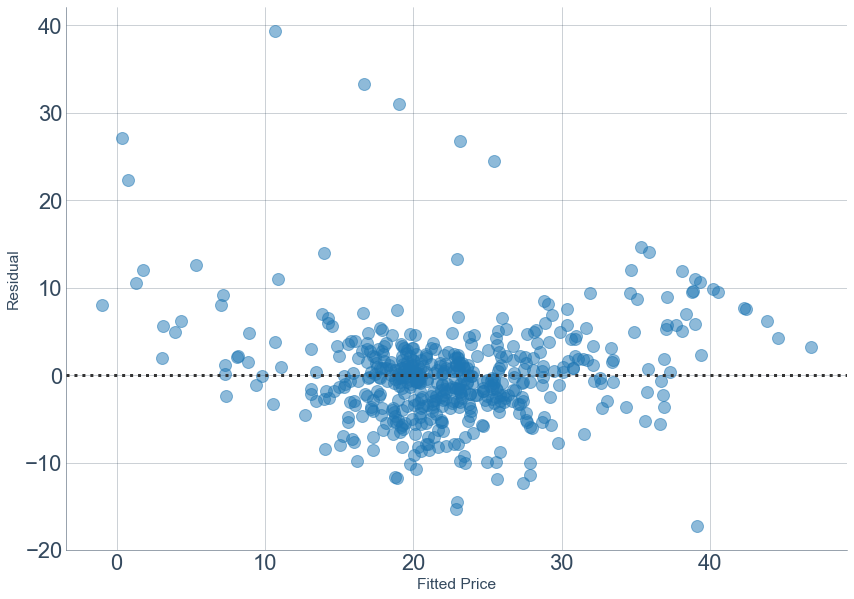

In [126]:
sns.residplot('m_3vars_fitted', 'PRICE', 
              data=bos,        
              scatter_kws={'color': 'C0', 'alpha': 0.5},
            );
plt.xlabel("Fitted Price")
plt.ylabel("Residual")

 No real trend is detected on this residual vs. Fitted price plot 

Text(0.5, 0, 'Normalized residuals')

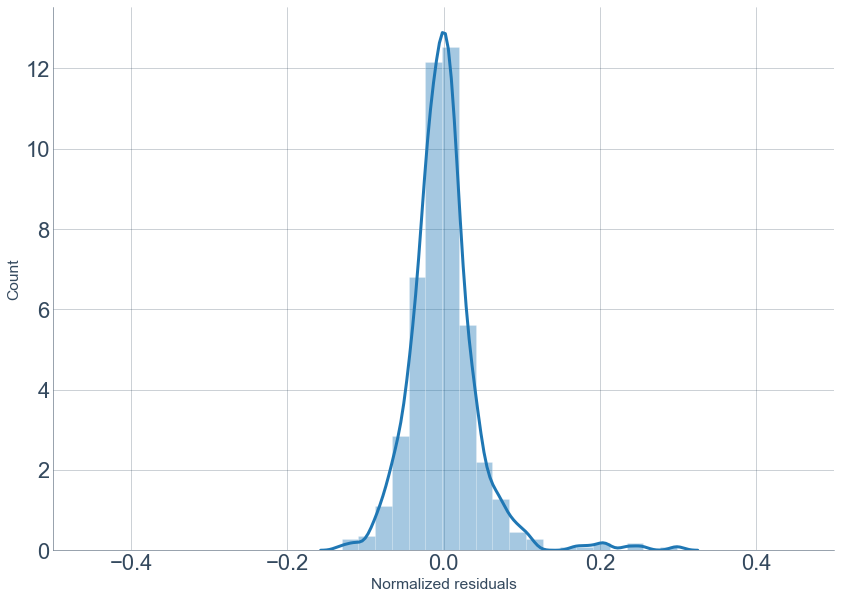

In [154]:
norm_resid_rom=np.linalg.norm(m_3vars.resid)
norm_resid=m_3vars.resid/norm_resid_rom
sns.distplot(norm_resid,bins=20)
#plt.hist(norm_resid,bins=13)
plt.xlim(-0.5,0.5)
plt.ylabel('Count')
plt.xlabel('Normalized residuals')

The residuals look normally distributed but there seem to be some outliers on the positive end of the distribution

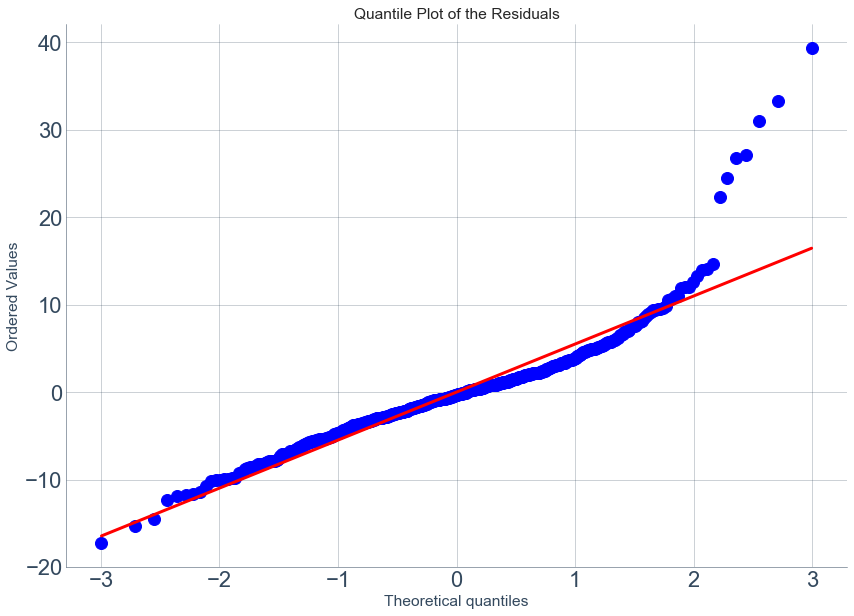

In [158]:
from scipy import stats
_=stats.probplot(m_3vars.resid, plot=sns.mpl.pyplot)
_ = plt.title('Quantile Plot of the Residuals')

The quantile plot of the residuals tells us that the plot of the residuals from our data matches the theoretical curve reasonably well except for some outliers for which the residual is more than 20

What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?

In [159]:
bos["m_3vars_resid"]=m_3vars.resid

In [183]:
outlier_list=bos["m_3vars_resid"][bos["m_3vars_resid"]>20].index.tolist()

Leverage 

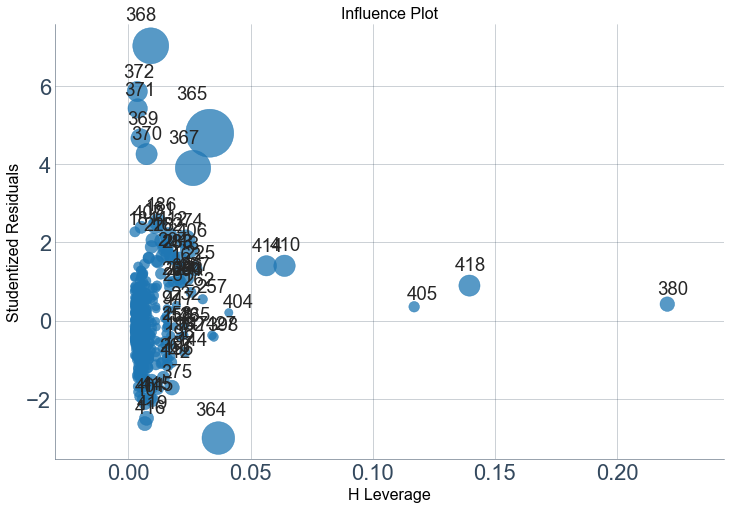

In [162]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(m_3vars, ax=ax, criterion="cooks")

In [164]:
model_cooks = m_3vars.get_influence().cooks_distance[0]

In [169]:
influence_low_high=np.argsort(model_cooks)

In [182]:
influence_top5_list=list(np.flip(influence_low_high)[:5])

In [184]:
to_remove = list(set(outlier_list  + influence_top5_list))

In [185]:
to_remove

[364, 365, 367, 368, 369, 370, 371, 372, 410]

In [186]:
bos_trim=bos.drop(bos.index[to_remove])

In [187]:
m_3vars_trim = ols('PRICE ~ CRIM + RM + PTRATIO', bos_trim).fit()

In [189]:
m_3vars_trim.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     443.0
Date:                Thu, 27 Jun 2019   Prob (F-statistic):          1.73e-139
Time:                        19:50:31   Log-Likelihood:                -1463.4
No. Observations:                 497   AIC:                             2935.
Df Residuals:                     493   BIC:                             2952.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.5955      3.282     -2.619      0.009     -15.044      -2.147
CRIM          -0.2206      0.026     -8.485      0.000      -0.272      -0.170
RM             8.2502      0.332     24.854      0.000       7.598       8.902
PTRATIO       -1.1014      0.105    -10.458      0.000      -1.308      -0.894
==============================================================================
Omnibus:                       12.219   Durbin-Watson:                   1.043
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               20.513
Skew:                           0.136   Prob(JB):                     3.51e-05
Kurtosis:                       3.958   Cond. No.                         318.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Dropping outliers and high leverage points resulted in a much better linear regression fit. All the relevant quantities improved like R2, F-statistic , AIC etc. 